NLP Project Semester 8.

In [ ]:
!pip install sumy

     |████████████████████████████████| 92kB 4.2MB/s 
     |████████████████████████████████| 10.1MB 9.0MB/s 
  Created wheel for breadability: filename=breadability-0.1.20-py2.py3-none-any.whl size=21680 sha256=64c9fe8502d594dd43ddb8703e8ffafd1a688d7f8547d207b3297914b0ac88e8
  Stored in directory: /root/.cache/pip/wheels/5a/4d/a1/510b12c5e65e0b2b3ce539b2af66da0fc57571e528924f4a52
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=367c4d234a40f46e15fbc57b813086656b29382b9539206bcb147e5fdadda317
  Stored in directory: /root/.cache/pip/wheels/33/4e/a6/be297e6b83567e537bed9df4a93f8590ec01c1acfbcd405348
Successfully built breadability pycountry


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ADMISSIONS.csv to ADMISSIONS.csv


In [ ]:
df_adm = pd.read_csv('ADMISSIONS.csv')

In [ ]:
df_adm.head(5)

,row_id,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admission_location,Unnamed: 8,discharge_location,Unnamed: 10,insurance,days_next_admit,language,religion,marital_status,ethnicity,edregtime,edouttime,diagnosis,hospital_expire_flag,has_chartevents_data,text
0,12258,10006,142345,23-10-2164 21:09,01-11-2164 17:15,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,NaN,HOME HEALTH CARE,NaN,Medicare,12,NaN,CATHOLIC,SEPARATED,BLACK/AFRICAN AMERICAN,23-10-2164 16:43,23-10-2164 23:00,SEPSIS,0,1,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
1,12263,10011,105331,14-08-2126 22:32,28-08-2126 18:59,28-08-2126 18:59,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,NaN,DEAD/EXPIRED,NaN,Private,0,NaN,CATHOLIC,SINGLE,UNKNOWN/NOT SPECIFIED,NaN,NaN,HEPATITIS B,1,1,"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ..."
2,12265,10013,165520,04-10-2125 23:36,07-10-2125 15:13,07-10-2125 15:13,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,NaN,DEAD/EXPIRED,NaN,Medicare,0,NaN,CATHOLIC,NaN,UNKNOWN/NOT SPECIFIED,NaN,NaN,SEPSIS,1,1,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."
3,12269,10017,199207,26-05-2149 17:19,03-06-2149 18:42,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,NaN,SNF,NaN,Medicare,15,NaN,CATHOLIC,DIVORCED,WHITE,26-05-2149 12:08,26-05-2149 19:45,HUMERAL FRACTURE,0,1,"HISTORY OF PRESENT ILLNESS: , A 71-year-old fe..."
4,12270,10019,177759,14-05-2163 20:43,15-05-2163 12:00,15-05-2163 12:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,NaN,DEAD/EXPIRED,NaN,Medicare,0,NaN,CATHOLIC,DIVORCED,WHITE,NaN,NaN,ALCOHOLIC HEPATITIS,1,1,"HISTORY OF PRESENT ILLNESS:, The patient is a ..."


In [ ]:
df_adm.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'UNNAMED: 8',
       'DISCHARGE_LOCATION', 'UNNAMED: 10', 'INSURANCE', 'DAYS_NEXT_ADMIT',
       'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME',
       'EDOUTTIME', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'HAS_CHARTEVENTS_DATA', 'TEXT'],
      dtype='object')

In [ ]:
df_adm.columns = df_adm.columns.str.upper()
df_adm.columns

Index(['ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION', 'UNNAMED: 8',
       'DISCHARGE_LOCATION', 'UNNAMED: 10', 'INSURANCE', 'DAYS_NEXT_ADMIT',
       'LANGUAGE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME',
       'EDOUTTIME', 'DIAGNOSIS', 'HOSPITAL_EXPIRE_FLAG',
       'HAS_CHARTEVENTS_DATA', 'TEXT'],
      dtype='object')

In [ ]:
df_adm.DIAGNOSIS.unique()

array(['SEPSIS', 'HEPATITIS B', 'HUMERAL FRACTURE', 'ALCOHOLIC HEPATITIS',
       'STROKE/TIA',
       ' MITRAL REGURGITATION;CORONARY ARTERY DISEASE\\CORONARY ARTERY BYPASS GRAFT WITH MVR  ? MITRAL VALVE REPLACEMENT /SDA',
       'SYNCOPE;TELEMETRY', 'RIGHT HUMEROUS FRACTURE',
       'RENAL FAILIURE-SYNCOPE-HYPERKALEMIA',
       'RECURRENT LEFT CAROTID STENOSIS,PRE HYDRATION',
       'FAILURE TO THRIVE', 'PULMONARY EDEMA\\CATH', 'UNSTABLE ANGINA',
       'RESPIRATORY DISTRESS', 'METASTATIC MELANOMA;BRAIN METASTASIS',
       'FEVER', 'BRAIN METASTASES', 'VARICEAL BLEED', 'LOWER GI BLEED',
       'CHEST PAIN/ CATH', 'SUBDURAL HEMATOMA/S/P FALL',
       'ESOPHAGEAL CANCER/SDA', 'S/P MOTORCYCLE ACCIDENT', 'SEIZURE',
       'GASTROINTESTINAL BLEED', 'LUNG CANCER;SHORTNESS OF BREATH',
       'HYPOTENSION', 'SEPSIS;PNEUMONIA;TELEMETRY',
       'CONGESTIVE HEART FAILURE', 'UROSEPSIS', 'BASAL GANGLIN BLEED',
       'OVERDOSE', 'CRITICAL AORTIC STENOSIS/HYPOTENSION',
       'HYPOTENSION;TELEMET

In [ ]:
df_adm.TEXT.iloc[0]

"CHIEF COMPLAINT: , Blood in urine.,HISTORY OF PRESENT ILLNESS:  ,This is a 78-year-old male who has prostate cancer with metastatic disease to his bladder and in several locations throughout the skeletal system including the spine and shoulder.  The patient has had problems with hematuria in the past, but the patient noted that this episode began yesterday, and today he has been passing principally blood with very little urine.  The patient states that there is no change in his chronic lower back pain and denies any incontinence of urine or stool.  The patient has not had any fever.  There is no abdominal pain and the patient is still able to pass urine.  The patient has not had any melena or hematochezia.  There is no nausea or vomiting.  The patient has already completed chemotherapy and is beyond treatment for his cancer at this time.  The patient is receiving radiation therapy, but it is targeted to the bones and intended to give symptomatic relief of his skeletal pain and not int

In [ ]:
df_adm.groupby('ADMISSION_TYPE').apply(lambda g: g.TEXT.isnull().sum())/df_adm.groupby('ADMISSION_TYPE').size()

ADMISSION_TYPE
ELECTIVE     0.0
EMERGENCY    0.0
URGENT       0.0
dtype: float64

In [ ]:
df_adm_clean = df_adm.loc[df_adm.ADMISSION_TYPE != 'NEWBORN'].copy()

In [ ]:
'''print('Fraction of missing notes:', df_adm_clean.TEXT.isnull().sum() / len(df_adm_clean))
print('Fraction notes with newlines:', df_adm_clean.TEXT.str.contains('\n').sum() / len(df_adm_clean))
print('Fraction notes with carriage returns:', df_adm_clean.TEXT.str.contains('\r').sum() / len(df_adm_clean))'''

"print('Fraction of missing notes:', df_adm_clean.TEXT.isnull().sum() / len(df_adm_clean))\nprint('Fraction notes with newlines:', df_adm_clean.TEXT.str.contains('\n').sum() / len(df_adm_clean))\nprint('Fraction notes with carriage returns:', df_adm_clean.TEXT.str.contains('\r').sum() / len(df_adm_clean))"

In [ ]:
df_adm_clean['OUTPUT_LABEL'] = (df_adm_clean.DAYS_NEXT_ADMIT.astype('int') < 30).astype('int')

In [ ]:
print('Number of positive samples:', (df_adm_clean.OUTPUT_LABEL == 1).sum())
print('Number of negative samples:',  (df_adm_clean.OUTPUT_LABEL == 0).sum())
print('Total samples:', len(df_adm_clean))

Number of positive samples: 97
Number of negative samples: 32
Total samples: 129


In [ ]:
df_adm_clean = df_adm_clean.sample(n = len(df_adm_clean), random_state = 42)
df_adm_clean = df_adm_clean.reset_index(drop = True)

# Save 30% of the data as validation and test data 
df_valid_test=df_adm_clean.sample(frac=0.30,random_state=42)

df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

# use the rest of the data as training data
df_train_all=df_adm_clean.drop(df_valid_test.index)

print('Test prevalence(n = %d):'%len(df_test),df_test.OUTPUT_LABEL.sum()/ len(df_test))
print('Valid prevalence(n = %d):'%len(df_valid),df_valid.OUTPUT_LABEL.sum()/ len(df_valid))
print('Train all prevalence(n = %d):'%len(df_train_all), df_train_all.OUTPUT_LABEL.sum()/ len(df_train_all))
print('all samples (n = %d)'%len(df_adm_clean))
assert len(df_adm_clean) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

Test prevalence(n = 20): 0.55
Valid prevalence(n = 19): 0.8421052631578947
Train all prevalence(n = 90): 0.7777777777777778
all samples (n = 129)


In [ ]:
rows_pos = df_train_all.OUTPUT_LABEL == 1
df_train_pos = df_train_all.loc[rows_pos]
df_train_neg = df_train_all.loc[~rows_pos]

# merge the balanced data
df_train = pd.concat([df_train_pos, df_train_neg.sample(n = len(df_train_pos), random_state = 42, replace = True)],axis = 0)

# shuffle the order of training samples 
df_train = df_train.sample(n = len(df_train), random_state = 42).reset_index(drop = True)

print('Train prevalence (n = %d):'%len(df_train), df_train.OUTPUT_LABEL.sum()/ len(df_train))

Train prevalence (n = 140): 0.5


In [ ]:
def preprocess_text(df):       
    # This function preprocesses the text by filling not a number and replacing new lines ('\n') and carriage returns ('\r')
    df.TEXT = df.TEXT.fillna(' ')
    df.TEXT =df.TEXT.str.replace('\n',' ')
    df.TEXT =df.TEXT.str.replace('\r',' ')
    return df

In [ ]:
df_train = preprocess_text(df_train)
df_valid = preprocess_text(df_valid)
df_test = preprocess_text(df_test)

In [ ]:
import nltk
nltk.download('punkt')
from nltk import word_tokenize
word_tokenize('This should be tokenized. 02/02/2018 sentence has stars**')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['This',
 'should',
 'be',
 'tokenized',
 '.',
 '02/02/2018',
 'sentence',
 'has',
 'stars**']

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
def tokenizer_better(text):
    # tokenize the text by replacing punctuation and numbers with spaces and lowercase all words
    
    punc_list = string.punctuation+'0123456789'
    t = str.maketrans(dict.fromkeys(punc_list, " "))
    text = text.lower().translate(t)
    tokens = word_tokenize(text)
    return tokens

In [ ]:
tokenizer_better('This should be tokenized. 02/02/2018 sentence has stars**')

['this', 'should', 'be', 'tokenized', 'sentence', 'has', 'stars']

In [ ]:
sample_text = ['Data science is about the data', 'The science is amazing', 'Predictive modeling is part of data science']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(tokenizer = tokenizer_better)
vect.fit(sample_text)

# matrix is stored as a sparse matrix (since our dataset has a lot of zero values in Days_until_next_admit)
X = vect.transform(sample_text)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [ ]:
X

<3x10 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [ ]:
X.toarray()

array([[1, 0, 2, 1, 0, 0, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 0, 0, 1, 1],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0]])

In [ ]:
vect.get_feature_names()

['about',
 'amazing',
 'data',
 'is',
 'modeling',
 'of',
 'part',
 'predictive',
 'science',
 'the']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, tokenizer = tokenizer_better, ngram_range=(2,2))


vect.fit(df_train.TEXT.values)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=3000, min_df=1,
                ngram_range=(2, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenizer_better at 0x7f66649719e0>,
                vocabulary=None)

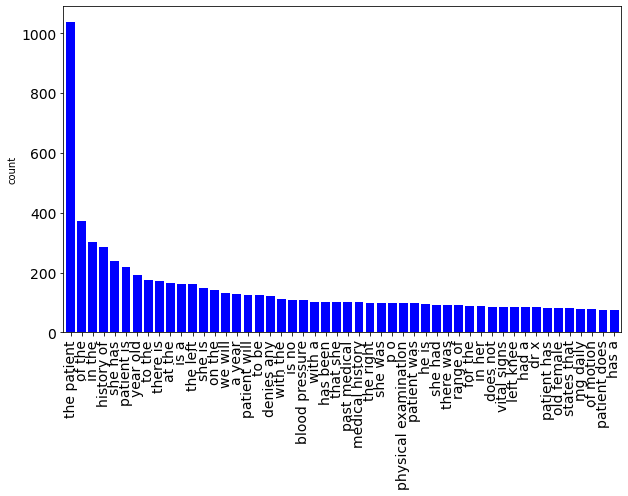

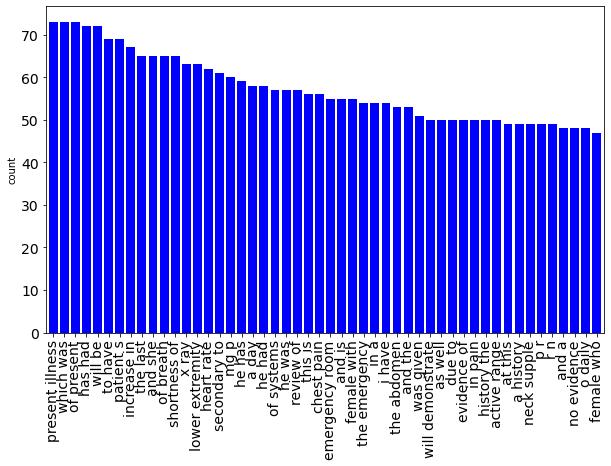

In [ ]:
neg_doc_matrix = vect.transform(df_train[df_train.OUTPUT_LABEL == 0].TEXT)
pos_doc_matrix = vect.transform(df_train[df_train.OUTPUT_LABEL == 1].TEXT)
neg_tf = np.sum(neg_doc_matrix,axis=0)
pos_tf = np.sum(pos_doc_matrix,axis=0)
neg = np.squeeze(np.asarray(neg_tf))
pos = np.squeeze(np.asarray(pos_tf))

term_freq_df = pd.DataFrame([neg,pos],columns=vect.get_feature_names()).transpose()
term_freq_df.columns = ['negative', 'positive']
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['positive']
term_freq_df.sort_values(by='total', ascending=False).iloc[:10]

#Create a series from the sparse matrix
d = pd.Series(term_freq_df.total, 
              index = term_freq_df.index).sort_values(ascending=False)
ax = d[:50].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()
ax = d[50:100].plot(kind='bar', figsize=(10,6), width=.8, fontsize=14, rot=90,color = 'b')
ax.title.set_size(18)
plt.ylabel('count')
plt.show()

In [ ]:
my_stop_words = ['the','and','to','of','was','with','a','on','in','for','name',
                 'is','patient','s','he','at','as','or','one','she','his','her','am',
                 'were','you','pt','pm','by','be','had','your','this','date',
                'from','there','an','that','p','are','have','has','h','but','o',
                'namepattern','which','every','also', 'he had','p r','r n','and a','i have','he has','a day']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(max_features = 3000, 
                       tokenizer = tokenizer_better, 
                       stop_words = my_stop_words, ngram_range=(2,2))
# this could take a while
vect.fit(df_train.TEXT.values)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['day', 'i', 'n', 'r'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=3000, min_df=1,
                ngram_range=(2, 2), preprocessor=None,
                stop_words=['the', 'and', 'to', 'of', 'was', 'with', 'a', 'on',
                            'in', 'for', 'name', 'is', 'patient', 's', 'he',
                            'at', 'as', 'or', 'one', 'she', 'his', 'her', 'am',
                            'were', 'you', 'pt', 'pm', 'by', 'be', 'had', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function tokenizer_better at 0x7f66649719e0>,
                vocabulary=None)

In [ ]:
X_train_tf = vect.transform(df_train.TEXT.values)
X_valid_tf = vect.transform(df_valid.TEXT.values)

In [ ]:
y_train = df_train.OUTPUT_LABEL
y_valid = df_valid.OUTPUT_LABEL

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression(C = 0.0001, penalty = 'l2', random_state = 42)
clf.fit(X_train_tf, y_train)

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model = clf
y_train_preds = model.predict_proba(X_train_tf)[:,1]
y_valid_preds = model.predict_proba(X_valid_tf)[:,1]

In [ ]:
print(y_train[:10].values)
print(y_train_preds[:10])

[0 1 1 0 1 1 0 1 0 0]
[0.48767194 0.51427244 0.50020714 0.49777937 0.50917271 0.52240422
 0.4988166  0.49181352 0.46211579 0.46211579]


In [ ]:
def calc_accuracy(y_actual, y_pred, thresh):
    # this function calculates the accuracy with probability threshold at thresh
    return (sum((y_pred > thresh) & (y_actual == 1))+sum((y_pred < thresh) & (y_actual == 0))) /len(y_actual)

def calc_recall(y_actual, y_pred, thresh):
    # calculates the recall
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_actual)

def calc_precision(y_actual, y_pred, thresh):
    # calculates the precision
    return sum((y_pred > thresh) & (y_actual == 1)) /sum(y_pred > thresh)

def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def calc_prevalence(y_actual):
    # calculates prevalence
    return sum((y_actual == 1)) /len(y_actual)

Train AUC:0.790
Valid AUC:0.490
Train accuracy:0.743
Valid accuracy:0.684
Train recall:0.771
Valid recall:0.812
Train precision:0.730
Valid precision:0.812
Train specificity:0.714
Valid specificity:0.000
Train prevalence:0.500
Valid prevalence:0.842


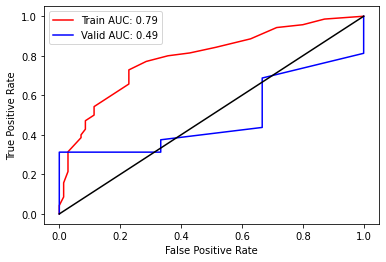

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)


thresh = 0.5

auc_train = roc_auc_score(y_train, y_train_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

print('Train AUC:%.3f'%auc_train)
print('Valid AUC:%.3f'%auc_valid)

print('Train accuracy:%.3f'%calc_accuracy(y_train, y_train_preds, thresh))
print('Valid accuracy:%.3f'%calc_accuracy(y_valid, y_valid_preds, thresh))

print('Train recall:%.3f'%calc_recall(y_train, y_train_preds, thresh))
print('Valid recall:%.3f'%calc_recall(y_valid, y_valid_preds, thresh))

print('Train precision:%.3f'%calc_precision(y_train, y_train_preds, thresh))
print('Valid precision:%.3f'%calc_precision(y_valid, y_valid_preds, thresh))

print('Train specificity:%.3f'%calc_specificity(y_train, y_train_preds, thresh))
print('Valid specificity:%.3f'%calc_specificity(y_valid, y_valid_preds, thresh))

print('Train prevalence:%.3f'%calc_prevalence(y_train))
print('Valid prevalence:%.3f'%calc_prevalence(y_valid))


plt.plot(fpr_train, tpr_train,'r-', label = 'Train AUC: %.2f'%auc_train)
plt.plot(fpr_valid, tpr_valid,'b-',label = 'Valid AUC: %.2f'%auc_valid)
plt.plot([0,1],[0,1],'-k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
new_df = df_adm['TEXT'].copy()
new_df.head()

0    CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ...
1    CHIEF COMPLAINT: , Blood in urine.,HISTORY OF ...
2    HISTORY OF PRESENT ILLNESS:, The patient is a ...
3    HISTORY OF PRESENT ILLNESS: , A 71-year-old fe...
4    HISTORY OF PRESENT ILLNESS:, The patient is a ...
Name: TEXT, dtype: object

In [ ]:
import nltk 
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.tokenize import word_tokenize, sent_tokenize 
stop_words = set(stopwords.words('english')) 

pat_num = int(input('Enter the patient number for which you want to perform POS tagging: '))

text = new_df[pat_num]

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
tokenized = sent_tokenize(text) 
for i in tokenized: 
    

    wordsList = nltk.word_tokenize(i) 

    wordsList = [w for w in wordsList if not w in stop_words] 

    tagged = nltk.pos_tag(wordsList) 

    print(tagged) 




from textblob import TextBlob
 
# Function to generate n-grams from sentences.
def extract_ngrams(data, num):
    n_grams = TextBlob(data).ngrams(num)
    return [ ' '.join(grams) for grams in n_grams]
 
data = new_df[pat_num]
 
print("") 
print("1-gram: ", extract_ngrams(data, 1))
print("2-gram: ", extract_ngrams(data, 2))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Enter the patient number for which you want to perform POS tagging: 4
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('HISTORY', 'NN'), ('OF', 'NNP'), ('PRESENT', 'NNP'), ('ILLNESS', 'NNP'), (':', ':'), (',', ','), ('The', 'DT'), ('patient', 'JJ'), ('71-year-old', 'JJ'), ('Caucasian', 'JJ'), ('female', 'NN'), ('history', 'NN'), ('diabetes', 'NNS'), (',', ','), ('osteoarthritis', 'NN'), (',', ','), ('atrial', 'JJ'), ('fibrillation', 'NN'), (',', ','), ('hypertension', 'NN'), (',', ','), ('asthma', 'NN'), (',', ','), ('obstructive', 'JJ'), ('sleep', 'NN'), ('apnea', 'NN'), ('CPAP', 'NNP'), (',', ','), ('diabetic', 'JJ'), ('foot', 'NN'), ('ulcer', 'NN'), (',

In [ ]:
pat_num = int(input('Enter the patient number for which you want the readmission probability and summary of the issue: '))
print("")
print("The probability of readmitting patient number", pat_num, "is -->", y_train_preds[pat_num-1])
print("")

from sumy.summarizers.lsa import LsaSummarizer
original_text = new_df[pat_num]

from sumy.nlp.tokenizers import Tokenizer
from sumy.parsers.plaintext import PlaintextParser
parser=PlaintextParser.from_string(original_text,Tokenizer('english'))

lsa_summarizer=LsaSummarizer()
lsa_summary= lsa_summarizer(parser.document,1)

# Printing the summary
for sentence in lsa_summary:
    print("The summary of patient number",pat_num,"is -->",sentence)

Enter the patient number for which you want the readmission probability and summary of the issue: 111

The probability of readmitting patient number 111 is --> 0.5091727115353961

The summary of patient number 111 is --> The left anterior descending has 30 to 40% narrowing with tortuosity in its proximal portion, patent first septal perforator branch.
